In [10]:
import warnings
warnings.filterwarnings("ignore")

import pymc3 as pm
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
np.random.seed(123)

n_experiments = 4
theta_real = 0.4
data = stats.bernoulli.rvs(
    p=theta_real, 
    size=n_experiments,
)

print(data)

[1 0 0 0]


In [12]:
with pm.Model() as our_first_model:
    theta = pm.Beta(
        "theta", 
        alpha=1, 
        beta=1,
    )
    y = pm.Bernoulli(
        "y", 
        p=theta, 
        observed=data,
    )
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(
        1000, 
        step=step, 
        start=start,
    )

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


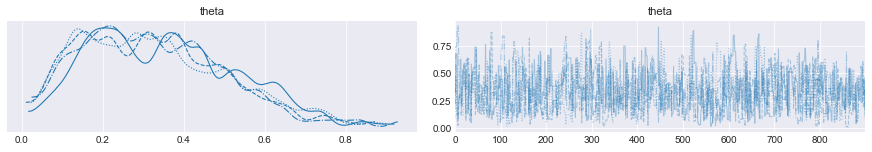

In [18]:
burnin = 100
chain = trace[burnin:]
pm.traceplot(chain);

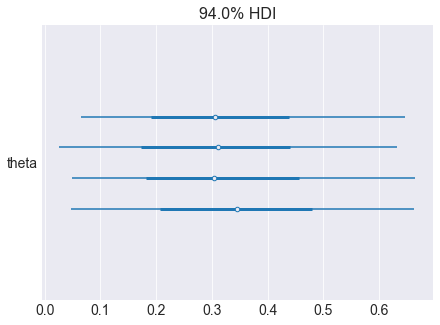

In [26]:
pm.forestplot(chain);

In [23]:
pm.summary(chain)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.333,0.179,0.047,0.656,0.007,0.005,646.0,790.0,1.01


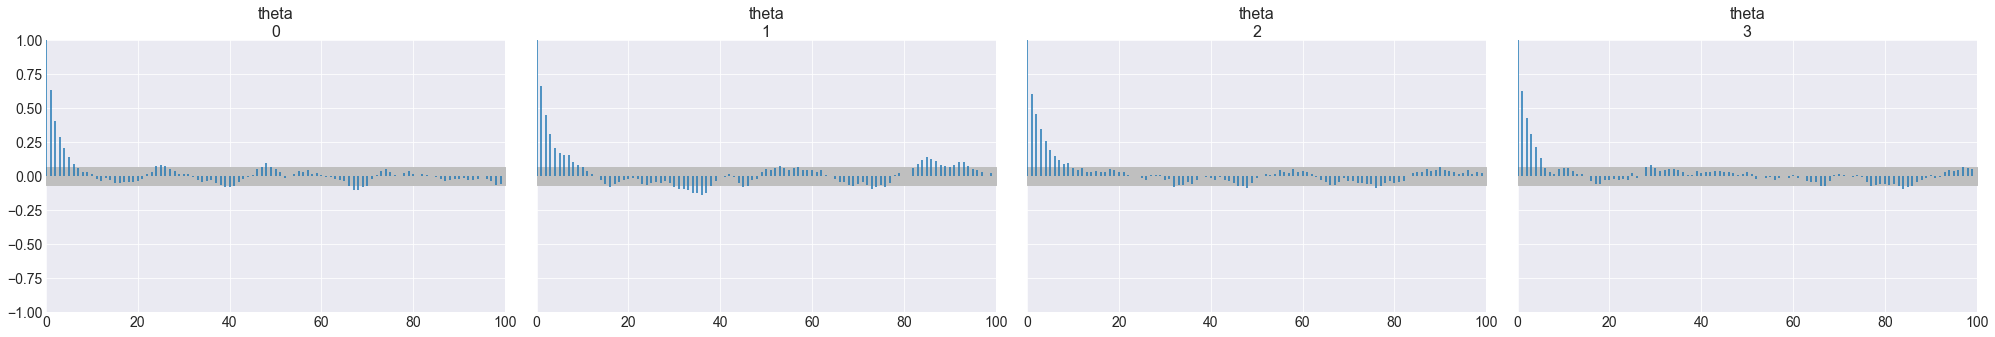

In [25]:
pm.autocorrplot(chain);

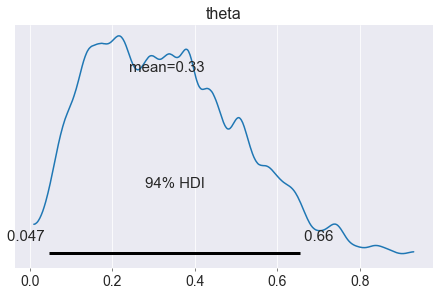

In [32]:
pm.plot_posterior(chain);

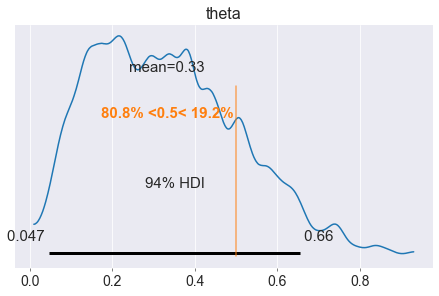

In [35]:
pm.plot_posterior(
    chain, 
    ref_val=0.5,
);